In [2]:
using Plots
using Random
using Logging

import Paths

disable_logging(Logging.Info)


function animate(settings; upf=100, frames=100)
    sim = Paths.MakeSimulation(settings);
    
    @gif for t in 1:frames
        print("\r$(t)/$(frames)")
        for u in 1:upf
            Paths.update!(sim)
        end
        Paths.viz(sim, markersize=7, showtext=false)
    end
end

[ Info: Precompiling Paths [4a712326-4906-46e3-95f2-b945078f68f6] (cache misses: include_dependency fsize change (2), incompatible header (16))


animate (generic function with 1 method)

In [55]:
function viz(sim; showtext=true, showwalkers=true, showlocations=true, markersize=MARKER_SIZE)
    X = sim.settings.X
    Y = sim.settings.Y
    discounts = sim.settings.maxCost .- Paths.costs(sim.world)
    patches = heatmap(1.5:(X+0.5), 1.5:(Y+0.5), transpose(discounts), axis=([], false), clims=(0, sim.settings.maxCost - 1), legend=nothing, aspect_ratio=:equal)
    if showwalkers
        walkers = scatter!(
            [(w.position[1], w.position[2]) for w in sim.walkers],
            label="", axis=([], false), color="#1f77b4", markersize=markersize,
        )
    end
    if showlocations
        locations = scatter!(
            [(l.position[1], l.position[2]) for l in sim.locations],
            label="", axis=([], false), color="#ff7f0e", markersize=markersize,
        )
    end
    if showtext
        annotate!(sim.settings.X, 1, text(sim.steps, :white, :right, :bottom, TEXT_SIZE))
        annotate!(sim.settings.X, 1 + TEXT_SIZE / 2, text(describeMeasures(sim), :white, :right, :bottom, TEXT_SIZE))
        annotate!(1, 1, text(describePatches(sim.settings), :white, :left, :bottom, TEXT_SIZE))
        annotate!(1, 1 + TEXT_SIZE / 2, text("$(sim.settings.recoveryLogic)", :white, :left, :bottom, TEXT_SIZE))
        annotate!(1, 1 + TEXT_SIZE, text(describeScenario(sim.settings), :white, :left, :bottom, TEXT_SIZE))
    end
    return patches
end

viz (generic function with 1 method)

In [109]:
sim = Paths.MakeSimulation(Paths.Settings(
        searchStrategy=Paths.DIRECT_SEARCH,
        patchImprovement=0.1,
        patchRecovery=0.001,
        recoveryLogic=Paths.LINEAR,
        improvementLogic=Paths.LINEAR,
        randomSeedWalkers=2,
        numWalkers=10,
        numLocations=10,
        scenario=Paths.RANDOM_FIXED,
        X=100, Y=100));

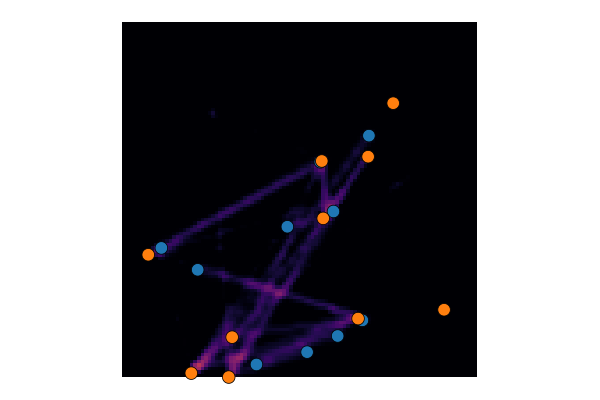

In [124]:
for i in 1:10
    Paths.update!(sim)
end
viz(sim, markersize=7, showtext=false, showwalkers=true)